In [2]:
# Fashion Trend Forecasting for Clothing Demand

#Business Question: 
#Which clothing categories should a fashion brand increase or reduce production for in the next season?


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/fashion-retail-sales")

print("Path to dataset files:", path)

Path to dataset files: /Users/areejkhurramkhurram/.cache/kagglehub/datasets/atharvasoundankar/fashion-retail-sales/versions/1


In [ ]:
import os

os.listdir(path)


['Fashion_Retail_Sales.csv']

In [7]:
csv_path = os.path.join(path, "Fashion_Retail_Sales.csv")
df = pd.read_csv(csv_path)

df.head()



,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash


In [8]:
df = df.rename(columns={
    'Customer Reference ID': 'CustomerID',
    'Item Purchased': 'Item',
    'Purchase Amount (USD)': 'Amount',
    'Date Purchase': 'Date',
    'Review Rating': 'Rating',
    'Payment Method': 'PaymentMethod'
})


In [9]:
df.head()


,CustomerID,Item,Amount,Date,Rating,PaymentMethod
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash


In [10]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CustomerID     3400 non-null   int64         
 1   Item           3400 non-null   object        
 2   Amount         2750 non-null   float64       
 3   Date           3400 non-null   datetime64[ns]
 4   Rating         3076 non-null   float64       
 5   PaymentMethod  3400 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 159.5+ KB


In [12]:
def categorize(item):
    item = item.lower()
    if item in ['tank top', 'tunic', 't-shirt', 'shirt']:
        return 'Tops'
    elif item in ['leggings', 'jeans', 'pants', 'trousers']:
        return 'Bottoms'
    elif item in ['jacket', 'coat']:
        return 'Outerwear'
    elif item in ['handbag', 'wallet']:
        return 'Accessories'
    else:
        return 'Other'

df['Category'] = df['Item'].apply(categorize)


In [13]:
df[['Item', 'Category']].head()


,Item,Category
0,Handbag,Accessories
1,Tunic,Tops
2,Tank Top,Tops
3,Leggings,Bottoms
4,Wallet,Accessories


In [14]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = (
    df.groupby(['Month', 'Category'])['Amount']
    .sum()
    .reset_index()
)

monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()
monthly_sales.head()


,Month,Category,Amount
0,2022-10-01,Accessories,1024.0
1,2022-10-01,Bottoms,1840.0
2,2022-10-01,Other,24914.0
3,2022-10-01,Outerwear,761.0
4,2022-10-01,Tops,2273.0


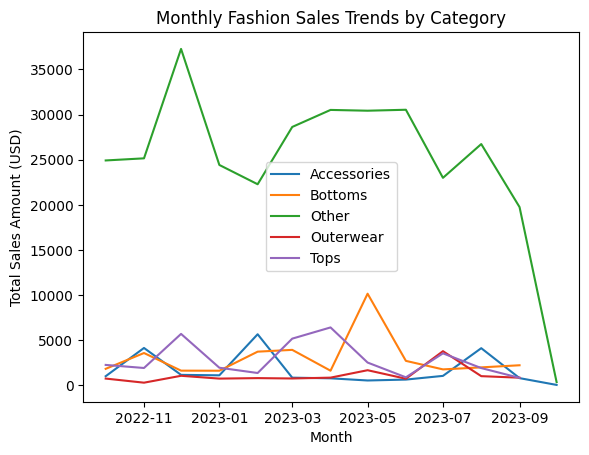

In [15]:
import matplotlib.pyplot as plt

plt.figure()
for cat in monthly_sales['Category'].unique():
    data = monthly_sales[monthly_sales['Category'] == cat]
    plt.plot(data['Month'], data['Amount'], label=cat)

plt.xlabel("Month")
plt.ylabel("Total Sales Amount (USD)")
plt.title("Monthly Fashion Sales Trends by Category")
plt.legend()
plt.show()


In [16]:
tops_data = monthly_sales[monthly_sales['Category'] == 'Tops'][
    ['Month', 'Amount']
].set_index('Month')

tops_data = tops_data.asfreq('MS')  # monthly frequency
tops_data = tops_data.fillna(0)

tops_data.head()


,Amount
Month,
2022-10-01,2273.0
2022-11-01,1933.0
2022-12-01,5708.0
2023-01-01,1962.0
2023-02-01,1378.0


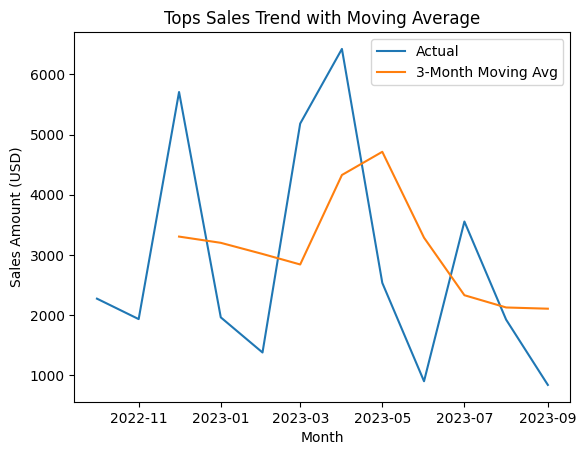

In [17]:
tops_data['MA_3'] = tops_data['Amount'].rolling(window=3).mean()

plt.figure()
plt.plot(tops_data.index, tops_data['Amount'], label='Actual')
plt.plot(tops_data.index, tops_data['MA_3'], label='3-Month Moving Avg')
plt.xlabel("Month")
plt.ylabel("Sales Amount (USD)")
plt.title("Tops Sales Trend with Moving Average")
plt.legend()
plt.show()


In [18]:
last_ma = tops_data['MA_3'].iloc[-1]

future_months = pd.date_range(
    start=tops_data.index[-1] + pd.offsets.MonthBegin(1),
    periods=3,
    freq='MS'
)

forecast = pd.DataFrame(
    {'Forecasted Amount': [last_ma]*3},
    index=future_months
)

forecast


,Forecasted Amount
2023-10-01,2106.0
2023-11-01,2106.0
2023-12-01,2106.0


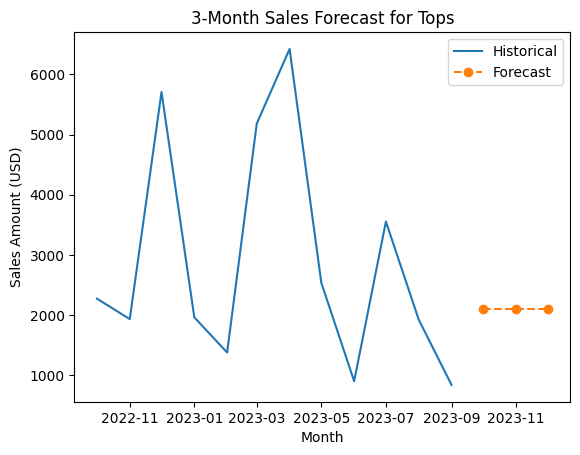

In [19]:
plt.figure()
plt.plot(tops_data.index, tops_data['Amount'], label='Historical')
plt.plot(forecast.index, forecast['Forecasted Amount'],
         linestyle='--', marker='o', label='Forecast')

plt.xlabel("Month")
plt.ylabel("Sales Amount (USD)")
plt.title("3-Month Sales Forecast for Tops")
plt.legend()
plt.show()


In [ ]:
## Forecast Insights for Fashion Brands

##- Sales for Tops are expected to remain stable over the next 3 months.
##- Brands should maintain current production levels rather than aggressively scaling.
##- Inventory planning should prioritize flexibility to respond to sudden trend shifts.
